In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')
import utils_auto 

# Configuration

In [3]:
trial_idx=9
paper='1106.6060'

# Code-generation prompts

In [4]:
prompt=(utils_auto.generate_prompt(template='prompt.md',docstring='docstring.md',paper=paper,save=True,trial_idx=trial_idx))

In [5]:
print(prompt)

You are a condensed matter physicist working on the numerical calculation for the Hamiltonian of a system using the Hartree Fock method. I will provide you with the physical Hamitonian written in second quantized form as an equation in LaTeX. You should convert it into a class for the HartreeFockHamiltonian using Python and necessary packages, such as numpy and scipy.
This is a multiple-step problem, and you will execute this process by analyzing the equation and answering smaller questions sequentially in order to finally generate the class. The class has the following structure:

CLASS DOCSTRING: 
```
class HartreeFockHamiltonian:
  def __init__(self, N_shell, parameters:dict[str, Any], filling_factor: float=0.5):
    self.lattice = 'square' | 'triangular'
    self.D = # LLM Task: has to define this tuple.
    self.basis_order = {'0': 'flavor_type_0', '1': 'flavor_type_1', ... 'D-1': 'flavor_type_D-1'}
    # this is the basis order that the Hamiltonian will follow

    # Occupancy re

# LLM-Generated code

In [6]:
generated_code = utils_auto.code_generate(prompt,max_tokens=25600,budget_tokens=12800,)


#################### THINKING ####################

Let's analyze this Hamiltonian step-by-step to build the HartreeFockHamiltonian class.

## QUESTION 1: Dimension and Basis Order

First, I need to identify the dimension and basis order from the Hamiltonian equation.

The Hamiltonian is written as:

```
H_MF = sum_{k, s} C^†_{k s} H_{k s} C_{k s} + f(n^p, η)
```

where `C^†_{k s} = (p^†_{x k s}, p^†_{y k s}, d^†_{k s})`.

This indicates a 3-component basis for each spin s, with the components being p_x, p_y, and d orbitals.

The single-particle Hamiltonian H_{k s} is a 3x3 matrix, consistent with the three orbitals.

Since s appears in the summation (spin index), and the basis has 3 orbitals, the total dimension tuple D should be (|spin|, |orbital|) = (2, 3). The |spin| is 2 because s typically represents spin-up and spin-down (↑,↓).

The basis order would be:
- Spin: up (↑), down (↓)
- Orbital: p_x, p_y, d

## QUESTION 2: Identifying Interacting Terms

Now let's look at the interact

In [7]:
print(generated_code['thinking'])

Let's analyze this Hamiltonian step-by-step to build the HartreeFockHamiltonian class.

## QUESTION 1: Dimension and Basis Order

First, I need to identify the dimension and basis order from the Hamiltonian equation.

The Hamiltonian is written as:

```
H_MF = sum_{k, s} C^†_{k s} H_{k s} C_{k s} + f(n^p, η)
```

where `C^†_{k s} = (p^†_{x k s}, p^†_{y k s}, d^†_{k s})`.

This indicates a 3-component basis for each spin s, with the components being p_x, p_y, and d orbitals.

The single-particle Hamiltonian H_{k s} is a 3x3 matrix, consistent with the three orbitals.

Since s appears in the summation (spin index), and the basis has 3 orbitals, the total dimension tuple D should be (|spin|, |orbital|) = (2, 3). The |spin| is 2 because s typically represents spin-up and spin-down (↑,↓).

The basis order would be:
- Spin: up (↑), down (↓)
- Orbital: p_x, p_y, d

## QUESTION 2: Identifying Interacting Terms

Now let's look at the interacting terms. In the Hamiltonian, we have a term f(n^p, 

In [8]:
print(generated_code['text'])

# ANSWER:

## 1) Dimension and Basis Order:
Tuple of Flavors (D) = (2, 3)
Basis Order:
0: spin. Order: up, down
1: orbital. Order: p_x, p_y, d

## 2) Identifying Interacting Terms:
EXP-VAL DEPENDENT TERMS: {
  "n^p": "Total density of holes on oxygen sites: np.mean(exp_val[0, 0, 0, 0, :] + exp_val[1, 0, 1, 0, :] + exp_val[0, 1, 0, 1, :] + exp_val[1, 1, 1, 1, :])",
  "η": "Nematic order parameter: np.mean(exp_val[0, 0, 0, 0, :] + exp_val[1, 0, 1, 0, :] - exp_val[0, 1, 0, 1, :] - exp_val[1, 1, 1, 1, :])",
  "n": "Total density of holes: np.mean(exp_val[0, 0, 0, 0, :] + exp_val[1, 0, 1, 0, :] + exp_val[0, 1, 0, 1, :] + exp_val[1, 1, 1, 1, :] + exp_val[0, 2, 0, 2, :] + exp_val[1, 2, 0, 2, :])"
}

TERMS:
- γ_1(k_x) = -2t_{pd} * cos(k_x/2) → H[s, 0, s, 2, :] and H[s, 2, s, 0, :], NI
- γ_1(k_y) = -2t_{pd} * cos(k_y/2) → H[s, 1, s, 2, :] and H[s, 2, s, 1, :], NI
- γ_2(k) = -4t_{pp} * cos(k_x/2) * cos(k_y/2) → H[s, 0, s, 1, :] and H[s, 1, s, 0, :], NI
- ξ_x = Δ + U_p_tilde * n^p/4 - V_pp_tilde 

In [9]:
code = utils_auto.extract_code(generated_code['text'])

In [10]:
print(code)

import numpy as np
from typing import Any, Dict, Tuple
from HF import *

class HartreeFockHamiltonian:
    """Hartree-Fock Hamiltonian for a three-orbital (p_x, p_y, d) model on a square lattice.
    
    This model represents a simplified model for cuprate superconductors with oxygen p orbitals
    and copper d orbitals, including interactions.
    
    Args:
        N_shell (int): Number of shells in the first Brillouin zone.
        parameters (dict): Dictionary containing model parameters.
        filling_factor (float, optional): Filling factor (default 0.5).
    """
    def __init__(self, N_shell: int, parameters: Dict[str, Any]={}, filling_factor: float=0.5):
        self.lattice = 'square'
        self.D = (2, 3)  # (spin, orbital)
        self.basis_order = {'0': 'spin', '1': 'orbital'}
        # Spin: up, down
        # Orbital: p_x, p_y, d
        
        # Occupancy relevant parameters
        self.nu = filling_factor
        self.T = parameters.get('T', 0)  # temperature,

In [11]:
utils_auto.save_code(code,paper,trial_idx)

Code saved to code_1106_6060_9.py


# Code evaluation

In [12]:
code_path = 'code_{int}_{decimal}_{trial_idx}'.format(int=paper.split('.')[0],decimal=paper.split('.')[1],trial_idx=trial_idx) 

In [13]:
import importlib

In [14]:
module = importlib.import_module(code_path)

In [15]:
import HF

## Task 1: Check k-space

In [16]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

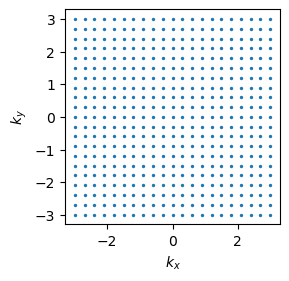

In [17]:
fig1=utils_auto.plot_kspace(kspace=ham.k_space)

## Task 2: Check energy dispersion for non-interacting term

In [18]:
ham = module.HartreeFockHamiltonian(N_shell=10,parameters={'Delta':0,'U_p':0,'U_d':0,'V_pp':0,'V_pd':1e-5,'t_pd':1,'t_pp':1},filling_factor=1/3)


In [19]:
h_nonint = ham.generate_non_interacting()

In [20]:
wf,en= HF.diagonalize(h_nonint) # or HF.diagonalize

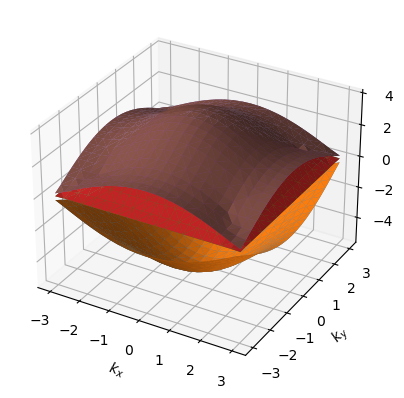

In [21]:
utils_auto.plot_2d_bandstructure(ham,en)

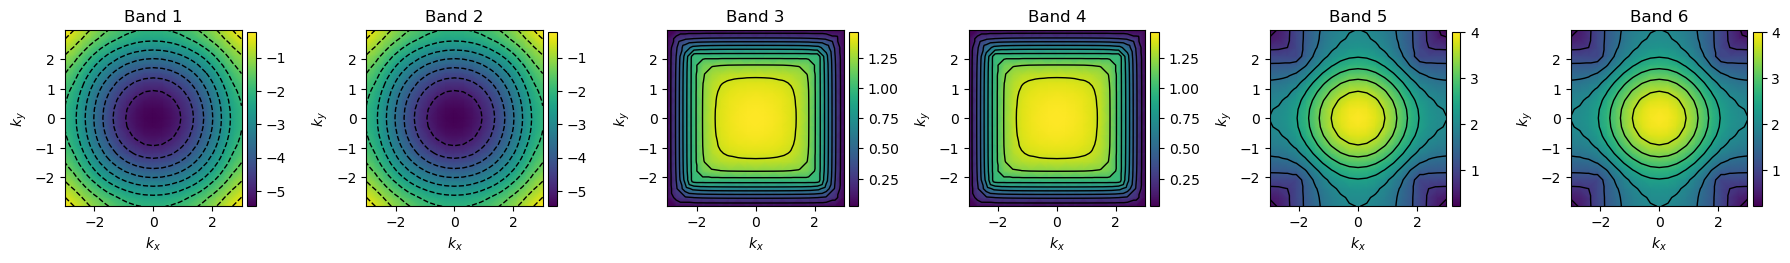

In [22]:
fig2=utils_auto.plot_2d_false_color_map(ham,en)

## Task 3: Infinitesemial U limit

In [23]:
ham_int= module.HartreeFockHamiltonian(N_shell=10,  
parameters={'Delta':5,'U_p':0,'U_d':0,'V_pp':0,'V_pd':1e-5,'t_pd':1,'t_pp':1},filling_factor=1/3)

In [24]:
wf,en= HF.diagonalize(ham_int.generate_non_interacting())
exp_val= HF.get_exp_val(wf,en,1/3,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [25]:
wf_int, en_int, exp_val_int= HF.solve(ham_int,exp_val,100)

Convergence reached at iteration 5


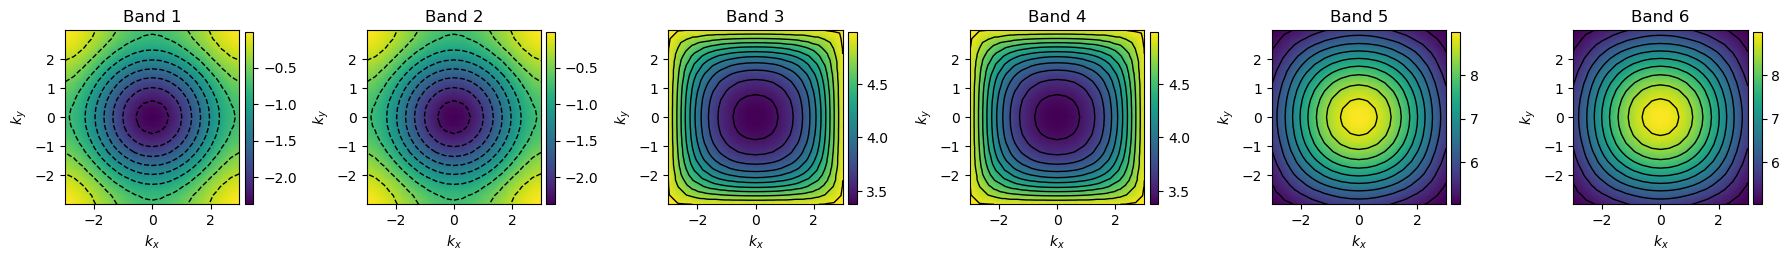

In [26]:
fig3=utils_auto.plot_2d_false_color_map(ham_int,en_int)

## Task 4: Large U limit

In [27]:
ham_int= module.HartreeFockHamiltonian(N_shell=10,  parameters={'Delta':5,'U_p':0,'U_d':0,'V_pp':0,'V_pd':1e5,'t_pd':1,'t_pp':1},filling_factor=1/3)


In [28]:
h_nonint=ham_int.generate_non_interacting()
h_nonint[:,2,:,2,:]-=100
wf,en=HF.diagonalize(h_nonint)
exp_val=HF.get_exp_val(wf,en,1/3,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [29]:
wf_int, en_int, exp_val_int=HF.solve(ham_int,exp_val,99)

Convergence reached at iteration 2


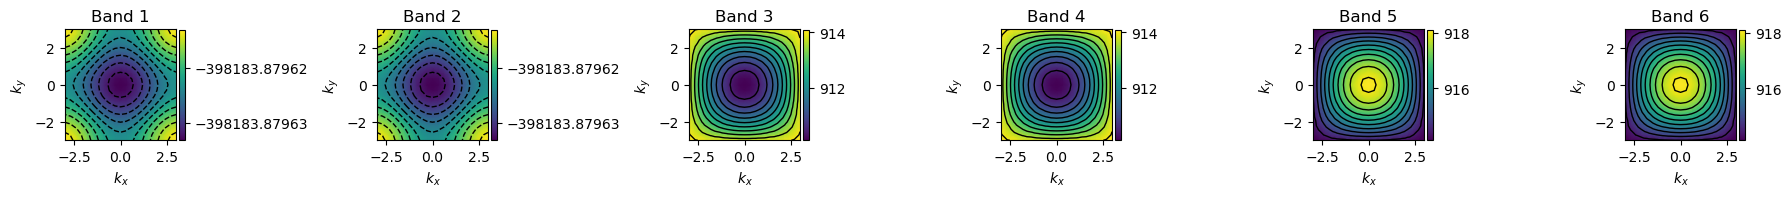

In [30]:
fig4=utils_auto.plot_2d_false_color_map(ham_int,en_int)

In [31]:
utils_auto.print_gap(ham_int,exp_val,en_int,2)

Gap is 399093.97
U/T is 67118.96
mean_U is 31120.98


# Auto eval

## Task 1

In [32]:
result1 = utils_auto.vision_eval(
    fig=fig1, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics1.md', image='image1.md', paper=paper)
    )


#################### THINKING ####################

Let's analyze this problem step by step based on the rubric.

The rubric asks me to check if:
1. The image shows a momentum space mesh in the first Brillouin zone of the concerned problem
2. I need to check the point group symmetry

Let me look at the image:

The image shows a 2D grid of blue dots in a square region, with x-axis labeled as k_x and y-axis labeled as k_y. The axes range from approximately -3 to 3 in both directions. The dots appear to be evenly spaced in a grid pattern.

Now, let's connect this to the problem:

1. The Hamiltonian is given for a square lattice system
2. The momentum k appears in the Hamiltonian in terms like γ₁(kₓ), γ₁(kᵧ), and γ₂(k)
3. These functions involve terms like cos(kₓ/2) and cos(kᵧ/2)

First Brillouin Zone for a Square Lattice:
For a square lattice with lattice constant a, the first Brillouin zone (FBZ) is a square in k-space with corners at (±π/a, ±π/a). If we set a=1 for simplicity, the FBZ 

In [33]:
answer1=utils_auto.extract_result_content(result1['text'])

## Task 2

In [34]:
result2 = utils_auto.vision_eval(
    fig=fig2, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics2.md', image='image2.md', paper=paper)
    )


#################### THINKING ####################

Alright, let's analyze this band structure plot for a condensed matter physics problem using the Hartree-Fock method. I'll go through the rubric step by step to determine whether the band structure shown is correct.

The image shows 6 different bands (Band 1 through Band 6) plotted in the first Brillouin zone. Each plot shows the energy as a function of k_x and k_y, the wave vectors in the x and y directions, respectively.

Let's follow the rubric:

1. Shape of the Brillouin zone boundary:
   The plots show a square region with k_x and k_y ranging from approximately -3 to +3. The Brillouin zone for a square lattice should indeed be square-shaped, so this aspect appears correct.

2. Symmetry of the energy distribution:

   2.1 Highest energy regions (yellow):
   - Bands 1 & 2: Highest energies (yellow) are at the edges/corners
   - Bands 3 & 4: Highest energies (yellow) are in the center in a square-like pattern
   - Bands 5 & 6: High

In [35]:
answer2=utils_auto.extract_result_content(result2['text'])

## Task 3

In [36]:
result3 = utils_auto.vision_eval(
    fig=fig3, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics3.md', image='image3.md', paper=paper)
    )


#################### THINKING ####################

Let me go through the rubric point by point and analyze the provided band structure plots:

1. **Identify the shape of the Brillouin zone boundary**
Looking at all the plots, I can see that the Brillouin zone is displayed with coordinates from approximately -3 to 3 in both kx and ky directions. The plots show a square-shaped region, which is consistent with the expected shape for a square lattice. This matches what's stated in the problem where it specifically says "LATTICE: square".

2. **Examine the symmetry of the energy distribution**

2.1 **Identify the highest energy regions (yellow)**
- In Band 1 and Band 2: The highest energy regions (yellow) are at the corners of the Brillouin zone.
- In Band 3 and Band 4: The highest energy regions are along the boundary of the Brillouin zone.
- In Band 5 and Band 6: The highest energy regions are at the center of the Brillouin zone.

2.2 **Trace the pattern of energy variation across the z

In [37]:
answer3=utils_auto.extract_result_content(result3['text'])

## Task 4

In [38]:
result4 = utils_auto.vision_eval(
    fig=fig4, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics4.md', image='image4.md', paper=paper,U_int='4*V_pd = 4e5')
    )


#################### THINKING ####################

I'm evaluating a series of band structure plots from a Hartree-Fock calculation of a system with a specific Hamiltonian. Let me analyze this step by step according to the rubric:

1. First, identify the shape of the Brillouin zone boundary:
Looking at the six band plots, each appears to be shown in a square region, with kx and ky axes ranging from approximately -2.5 to 2.5. This is consistent with a square lattice Brillouin zone, which typically has a square shape in reciprocal space. So this appears correct.

2. Examine the symmetry of the energy distribution shown by the false color plot:

2.1 Highest energy regions (yellow):
- In Bands 1-4: The highest energy regions appear to be at the edges of the Brillouin zone
- In Bands 5-6: The highest energy regions are concentrated in the center (around k = 0)

2.2 Pattern of energy variation:
- Bands 1-2: Show a circular/radial symmetry with lowest energy (purple) at the center
- Bands 3-

In [39]:
answer4=utils_auto.extract_result_content(result4['text'])

In [40]:
utils_auto.save_final_answer(paper,trial_idx,answer1,answer2,answer3,answer4)

Final answer record for '9' saved to final_answer.yaml
